In [7]:
%matplotlib inline

In [8]:
from pylab import *

In [9]:
V_sun = 4.83 #V-band

###########
r_sun = 4.676 #r-band from table I of Into & Portinari 2013
###########

def Mass2Light(g,i):
    '''Stellar Mass-to-Light ratio calculation.'''
    R = 0.223 * 10**(1.005*(g-i)) 
    return(R)
    
def Vband(g,r):
    '''V-band apparent magnitude'''
    V = g - 0.565*(g-r) - 0.016
    return(V)

def Luminosity(V):
    '''Luminosity per solar unit'''
    L = 10**(-(V-V_sun)/2.5)
    return(L)

def Abs(V):
    '''Absolute Magnitude from Apparent Magnitude'''
    M = V - 5.0*(log10(98.0*10**5))
    return(M)

###########################
def R_Luminosity(Ab_r):
    '''Luminosity per solar unit'''
    Lr = 10**(-(Ab_r-r_sun)/2.5)
    return(Lr)

def Absr(r_band):
    '''Absolute Magnitude from Apparent Magnitude'''
    Mr = r_band - 5.0*(log10(98.0*10**5))
    return(Mr)
###########################

def R_e(devRad,fracDev,expRad):
    '''The Effective radius'''
    Re = (devRad*fracDev) + expRad*( 1.0 - fracDev)
    return(Re)

G = 6.6**-11
def M_dyn(V,R):
    'Dynamical Mass from Median velocity and radius'
    M_dyn = (0.5 * V**2 *R) / G
    return(M_dyn)

In [10]:
%cd C:\Users\elvin\Desktop\Calstate LA\4200 computational physics\Labs and Exercises\week 9

#Coma Cluster data
data = genfromtxt('Coma Cluster 2.csv', names = True, delimiter = ',', unpack = True)
coma_g = data['g']
coma_i = data['i']
coma_r = data['r']
coma_SNoise = data['SNoise']
coma_disp = data['veldisp']

# devRad, fracDev, and expRad is all in the r band
coma_devrad = data['deVRad_r']
coma_fracdev = data['fracDev_r']
coma_exprad = data['expRad_r']


good_data = where((coma_SNoise >= 10) & (coma_disp >= 70))[0]
# Needed to index because some entries for the Velocity dispersion were zero.
coma_g = coma_g[good_data]
coma_i = coma_i[good_data]
coma_r = coma_r[good_data]
coma_Vdisp = coma_disp[good_data]
coma_devrad = coma_devrad[good_data]
coma_fracdev = coma_fracdev[good_data]
coma_exprad = coma_exprad[good_data]
coma_SNoise = coma_SNoise[good_data]



C:\Users\elvin\Desktop\Calstate LA\4200 computational physics\Labs and Exercises\week 9


In [11]:
data = genfromtxt('Data.csv', unpack = True, names = True, delimiter = ',')
cE = genfromtxt('cE.csv', unpack = True, names = True, delimiter =',')

ce_mass = cE['Mstar']
ce_sig = cE['Sig']


names = data['Name']
typ = data['type']
ra = data['RA']
dec = data['Dec']
Mv = data['Mv']
Mass = data['Mstar']
Re = data['Re']
sig = data['Sig']

## use isfinite() to index out the nan values

names = names[isfinite(names)]
typ = typ[isfinite(typ)]
ra = ra[isfinite(ra)]
dec = dec[isfinite(dec)]
Mv = Mv[isfinite(Mv)]
Mass_data = Mass[isfinite(Mass)]
Re = Re[isfinite(Re)]
sig = sig[isfinite(sig)]

EsS0s = where(typ == 1)[0]
dEsdS0s = where(typ == 2)[0]
dSphs = where(typ == 3)[0]
NSC = where(typ == 4)[0]
GC = where(typ == 5)[0]
New = where(typ == 6)[0]
YMCs = where(typ == 7)[0]

#Indexed masses
Mass1 = Mass_data[EsS0s]
Mass2 = Mass_data[dEsdS0s]
Mass3 = Mass_data[dSphs]
Mass4 = Mass_data[NSC]
Mass5 = Mass_data[GC]
Mass6 = Mass_data[New]
Mass7 = Mass_data[YMCs]

#Indexed velocity disperions
sig1 = sig[EsS0s]
sig2 = sig[dEsdS0s]
sig3 = sig[dSphs]
sig4 = sig[NSC]
sig5 = sig[GC]
sig6 = sig[New]
sig7 = sig[YMCs]

allmass= []
i = 0
for a in [Mass1,Mass2,Mass3,Mass4,Mass5,Mass6,Mass7]:
    allmass.append(a)
allmass = concatenate(array(allmass))


4.882872907284388
12.249951891595135


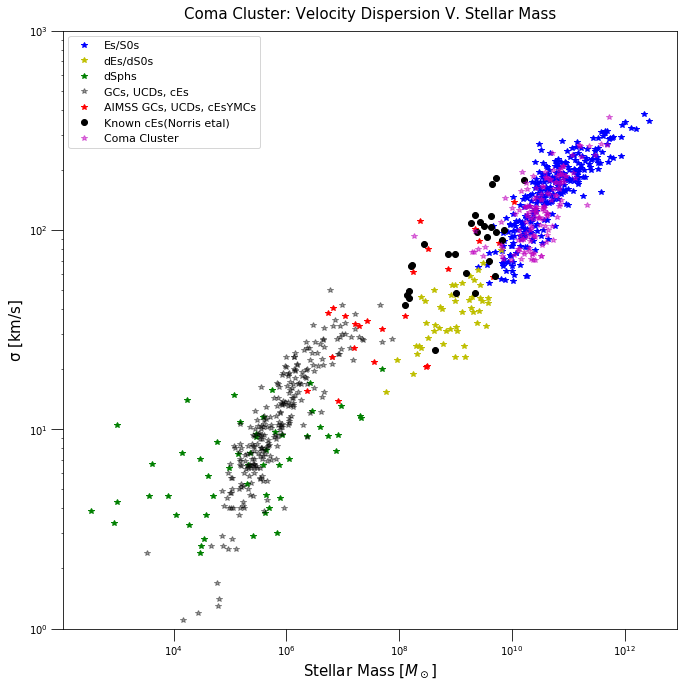

In [12]:

MassLight = Mass2Light(coma_g,coma_i)
#MassLight = R
V = Vband(coma_g,coma_r)
Abs_v = Abs(V)
L = Luminosity(Abs_v)
Mass = MassLight * L

############# Calculating the mass of each object
Abs_r = Absr(coma_r)
L_r = R_Luminosity(Abs_r)
Mass_r = MassLight * L_r
#############


fig1 = figure(figsize = [11,11])
title('Coma Cluster: Velocity Dispersion V. Stellar Mass', fontsize = 15,y = 1.01)
#xscale('log')
axis('auto')
ylabel('$\mathrm{\sigma}$ [km/s]',fontsize = 15)
xlabel('Stellar Mass [$M_\odot$]',fontsize = 15)
tick_params(size = 12)

##best fit line
x_fit = linspace(min(Mass_r),max(Mass_r),len(Mass_r))
line = polyfit(Mass_r,coma_Vdisp,1)
fit = polyval(line, Mass_r)

print (mean(log(fit))) ### slope of best fit line = 4.35



#xlim([10**8,10**13])
ylim([1,1e3])
loglog(Mass1,sig1,'*b', alpha = 1, label = 'Es/S0s')
loglog(Mass2,sig2,'y*', alpha = 1, label = 'dEs/dS0s')
loglog(Mass3,sig3,'g*', alpha = 1, label = 'dSphs')
#loglog(Mass4,sig4,'c*', alpha = 1, label = 'Nuclear Star Clusters')
loglog(Mass5,sig5,'k*', alpha = .4, label = 'GCs, UCDs, cEs')
loglog(Mass6,sig6,'r*', alpha = 1, label = 'AIMSS GCs, UCDs, cEsYMCs')
#loglog(Mass7,sig7,'*', alpha = 1, color = 'orange', label = 'YMCs')
loglog(ce_mass,ce_sig,'ko', label = 'Known cEs(Norris etal)')

loglog(Mass_r,coma_Vdisp,'m*',alpha = .5, label ='Coma Cluster')

loglog(7*10**7,'--')

legend(loc = 'best', numpoints=1, fontsize = 11)
savefig('Coma Cluster Velocity Dispersion V. Stellar Mass Comparison(cEs4).png')

print (((mean(log(fit))-4.35)/4.35)*100)



C:\Users\elvin\Desktop\Calstate LA\4200 computational physics\Labs and Exercises\week 9


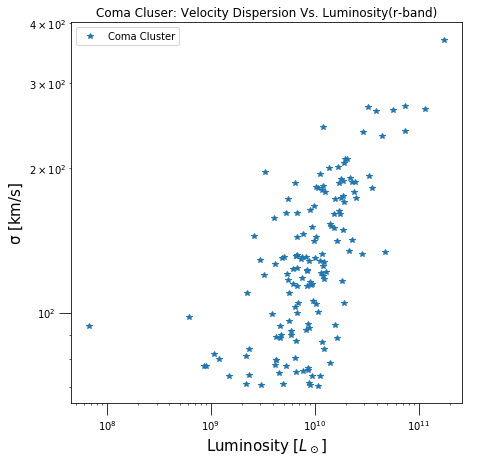

In [13]:
#effective radius
%cd C:\Users\elvin\Desktop\Calstate LA\4200 computational physics\Labs and Exercises\week 9

fig = figure(figsize=[7,7])

axis('auto')
ylabel('$\mathrm{\sigma}$ [km/s]',fontsize = 15)
xlabel('Luminosity [$L_\odot$]',fontsize = 15)
tick_params(size = 12)
title('Coma Cluser: Velocity Dispersion Vs. Luminosity(r-band)')
loglog(L_r,coma_Vdisp,'*', label = 'Coma Cluster')
legend(loc = 'best', numpoints = 1)
#savefig('Coma Cluter Velocity Dispersion Vs. Luminosity.png')

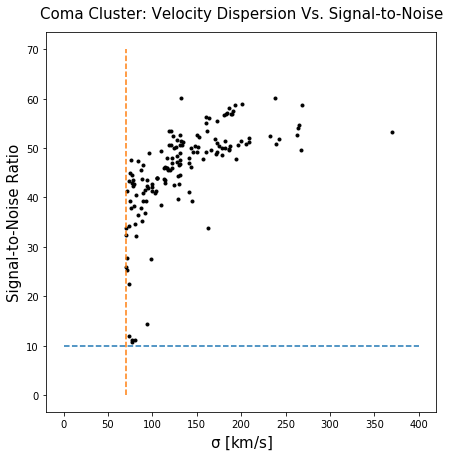

In [14]:
fig = figure(figsize = [7,7])
title('Coma Cluster: Velocity Dispersion Vs. Signal-to-Noise',y = 1.02, fontsize = 15)
ylabel('Signal-to-Noise Ratio', fontsize = 15)
xlabel('$\mathrm{\sigma}$ [km/s]', fontsize = 15)
plot(coma_Vdisp,coma_SNoise,'ko', markersize = 3)
plot([0,400],[10,10],'--')
plot([70,70],[0,70],'--')
#savefig('Velocity Dispersion Vs Signal-to-Noise.png')